# Geometric interpretation of PCA

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Define the unit vector
$\mathbf{v}_1 = \begin{pmatrix} \cos(\theta_1) \\ \sin(\theta_1)\end{pmatrix}$
where $\theta = \pi/6$ and a unit vector $\mathbf{v}_2 \perp \mathbf{v}_1$.

In [11]:
theta = np.pi/6

v1 = np.array([np.cos(theta), np.sin(theta)])
v2 = np.array([-np.sin(theta), np.cos(theta)])

Define the point $\mathbf{b} = \begin{pmatrix} 20 \\ 30\end{pmatrix}$

In [12]:
b = np.array([20, 30])

Generate $n = 1000$ points $\mathbf{x}_i$ according to the formula:

$\mathbf{x}_i = \mathbf{b} + r_{1,i} \rho_1 \mathbf{v}_1 + r_{2,i} \rho_2 \mathbf{v}_2$

where $\rho_1 = 12$, $\rho_2 = 3$ and the $r_{i,j}$ are real numbers independently generated according to a normal distribution. 

In [89]:
np.random.seed(42)

rho = np.array([[12,0],[0,3]])

n = 1000
r = np.random.normal(size=(n, 2))
X = b + r[:, 0][:, None] * rho[0, 0] * v1 + r[:, 1][:, None] * rho[1, 1] * v2
X = X.T

Plot the generated numbers in a plane, showing the directions $\mathbf{v}_1$ and $\mathbf{v}_2$, rescaled by $\rho_1$ and $\rho_2$, respectivaly.

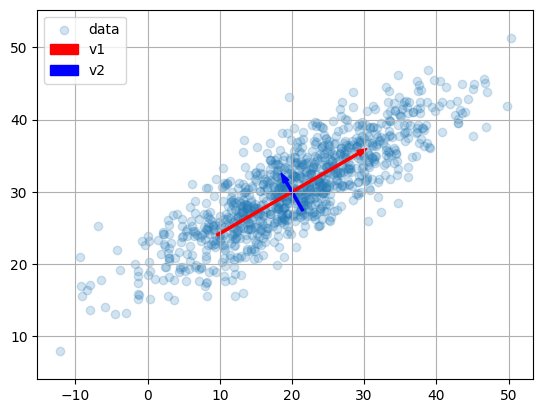

In [91]:
plt.scatter(X[0,:], X[1,:], alpha=0.2)

# Draw v1 arrow (rescaled by rho_1)
plt.arrow(b[0]-v1[0]*rho[0][0], b[1]-v1[1]*rho[0][0], 2*v1[0]*rho[0,0], 2*v1[1]*rho[0,0], width=0.3, color='r', label='v1', length_includes_head=True)
# Draw v2 arrow (rescaled by rho_2)
plt.arrow(b[0]-v2[0]*rho[1][1], b[1]-v2[1]*rho[1][1], 2*v2[0]*rho[1,1], 2*v2[1]*rho[1,1], width=0.3, color='b', label='v2', length_includes_head=True)

plt.axis('equal')
plt.grid()
plt.legend(['data', 'v1', 'v2'])

Perform PCA on the matrix $X$:

$\boldsymbol{\mu} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_i$

$\overline{X} = X - \boldsymbol{\mu} [1,\dots,1]$

$\overline{X} = U \Sigma V^T$

In [95]:
mu = np.mean(X, axis=1)
Xc = X - mu[:,None]

U, S, Vt = np.linalg.svd(Xc, full_matrices=False)

Plot the first two singular vectors, rescaled by the root of the sample variance:

${\sqrt{\frac{\sigma_1^2}{(n - 1)}}}{\mathbf{u}_1}, {\sqrt{\frac{\sigma_2^2}{(n - 1)}}}{\mathbf{u}_2}$

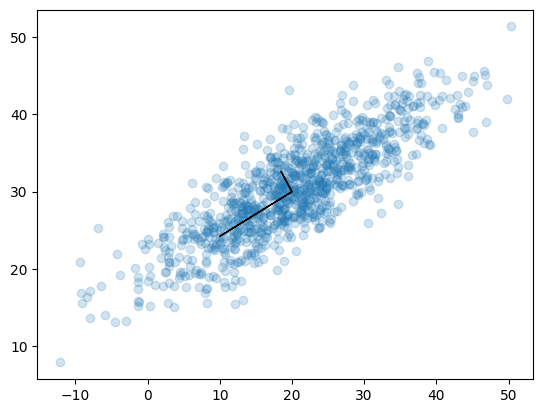

In [98]:
u1 = np.sqrt(S[0]**2/(n-1))*U[0,:]
u2 = np.sqrt(S[1]**2/(n-1))*U[1,:]

plt.scatter(X[0,:], X[1, :], alpha=0.2)
plt.arrow(b[0],b[1],u1[0],u1[1])
plt.arrow(b[0],b[1],u2[0],u2[1])

Compute the principal components of the data:

$\Phi = U^T \overline{X}$

In [101]:
Phi = U.T @ Xc
Phi

array([[-5.56190531, -7.3772502 ,  3.20871347, ..., -3.82137142,
         0.71855296,  2.35679981],
       [-0.58981591,  4.39273741, -0.87100583, ...,  3.03670434,
        -2.81604452, -2.40392769]], shape=(2, 1000))

Make a scatterplot of the two first principal components ($\phi_1$, $\phi_2$)

(np.float64(-40.342986089612744),
 np.float64(43.08813249488905),
 np.float64(-10.01604065187051),
 np.float64(12.402009274892002))

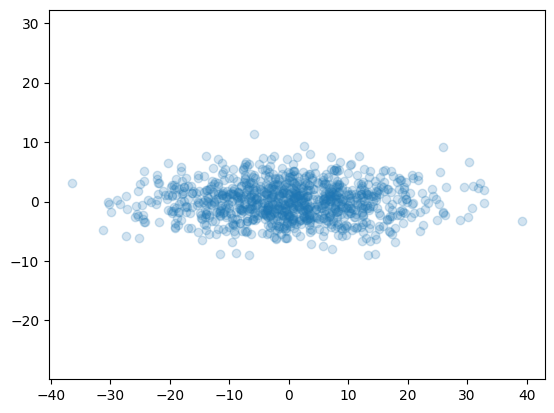

In [103]:
plt.scatter(Phi[0,:], Phi[1,:], alpha=0.2)
plt.axis('equal')